Using the old model prior to meeting to verify the recreation of the results.

In [1]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import qutip

import system.theoretical as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

1.3699999999999999


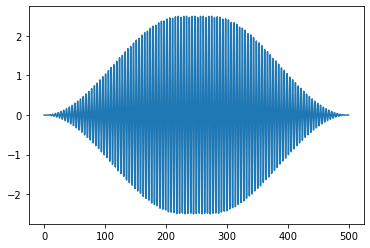

In [2]:
offset = 0.08
tlist = np.linspace(0, 500, 2000)
print(system.first_energy_spacing/3 - offset)
pulse_gen.setup(amplitude=2.5, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=0.9, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))

In [3]:
tlist = np.linspace(0, 1000, 10000)
solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=True)

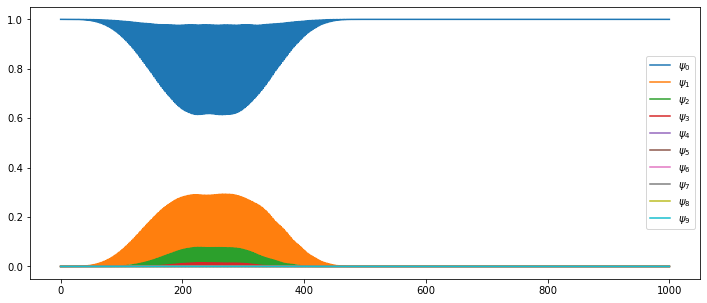

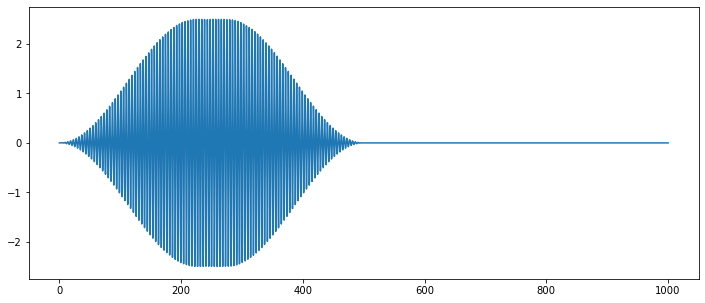

In [4]:
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))

In [5]:
expectation_values[1][-1]

6.335414179766137e-07

In [7]:
all_results = []
amp = 5.5
for off in np.linspace(0, 0.05, 50):
    print(off)
    for dur in np.linspace(1, 1000, 50):
        tlist = np.linspace(0, dur, int(dur*10))
        pulse_gen.setup(amplitude=amp, drive_frequency= system.first_energy_spacing/3 - off, ramp_coef=0.5, tlist=tlist)
        solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
        expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
        all_results.append({
            "fidelity": expectation_values[1][-1],
            "offset": off,
            "frequency":  system.first_energy_spacing/3 - off,
            "duration": dur,
            "amplitude": amp
        })

0.0
0.0010204081632653062
0.0020408163265306124
0.0030612244897959186
0.004081632653061225
0.005102040816326531
0.006122448979591837
0.0071428571428571435
0.00816326530612245
0.009183673469387756
0.010204081632653062
0.011224489795918368
0.012244897959183675
0.01326530612244898
0.014285714285714287
0.015306122448979593
0.0163265306122449
0.017346938775510204
0.018367346938775512
0.01938775510204082
0.020408163265306124
0.02142857142857143
0.022448979591836737
0.023469387755102045
0.02448979591836735
0.025510204081632654
0.02653061224489796
0.02755102040816327
0.028571428571428574
0.02959183673469388
0.030612244897959186
0.031632653061224494
0.0326530612244898
0.0336734693877551
0.03469387755102041
0.03571428571428572
0.036734693877551024
0.03775510204081633
0.03877551020408164
0.039795918367346944
0.04081632653061225
0.04183673469387755
0.04285714285714286
0.04387755102040817
0.04489795918367347
0.04591836734693878
0.04693877551020409
0.047959183673469394
0.0489795918367347
0.05


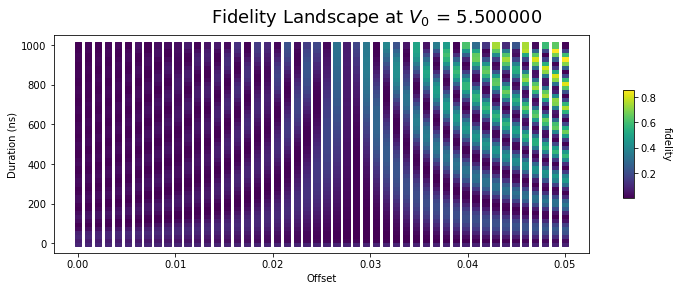

In [10]:
# %matplotlib widget

amps = []
offs = []
durs = []
fids = []
for result in all_results:
    amps.append(result["amplitude"])
    offs.append(result["offset"])
    durs.append(result["duration"])
    fids.append(result["fidelity"])

fig, axs = plt.subplots(figsize=(12, 4))
fig.suptitle("Fidelity Landscape at $V_0$ = %f " % amps[-1], fontsize=18)
axs.set_xlabel("Offset")
axs.set_ylabel("Duration (ns)")
surf = axs.scatter(offs, np.array(durs), c=fids, cmap=None, marker="s", s=40)
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel("fidelity", rotation=270)
cbar.ax.get_yaxis().labelpad = 15
# axs.pcolormesh(offs, durs, fids)

In [23]:
all_results2 = []
amp = 5.5
for off in np.linspace(0.02, 0.13, 100):
    print(off)
    for dur in np.linspace(1, 900, 40):
        tlist = np.linspace(0, dur, int(dur*2))
        pulse_gen.setup(amplitude=amp, drive_frequency= system.first_energy_spacing/3 - off, ramp_coef=0.5, tlist=tlist)
        solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
        expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
        all_results2.append({
            "fidelity": expectation_values[1][-1],
            "offset": off,
            "frequency":  system.first_energy_spacing/3 - off,
            "duration": dur,
            "amplitude": amp
        })

0.02
0.021111111111111112
0.022222222222222223
0.023333333333333334
0.024444444444444446
0.025555555555555557
0.026666666666666665
0.027777777777777776
0.028888888888888888
0.03
0.03111111111111111
0.03222222222222222
0.03333333333333333
0.034444444444444444
0.035555555555555556
0.03666666666666667
0.03777777777777778
0.03888888888888889
0.04
0.04111111111111111
0.042222222222222223
0.043333333333333335
0.044444444444444446
0.04555555555555556
0.04666666666666666
0.04777777777777778
0.048888888888888885
0.05
0.05111111111111111
0.052222222222222225
0.05333333333333333
0.05444444444444445
0.05555555555555555
0.05666666666666667
0.057777777777777775
0.05888888888888889
0.06
0.061111111111111116
0.06222222222222222
0.06333333333333334
0.06444444444444444
0.06555555555555556
0.06666666666666667
0.06777777777777778
0.06888888888888889
0.07
0.07111111111111111
0.07222222222222223
0.07333333333333333
0.07444444444444444
0.07555555555555556
0.07666666666666666
0.07777777777777778
0.07888888888

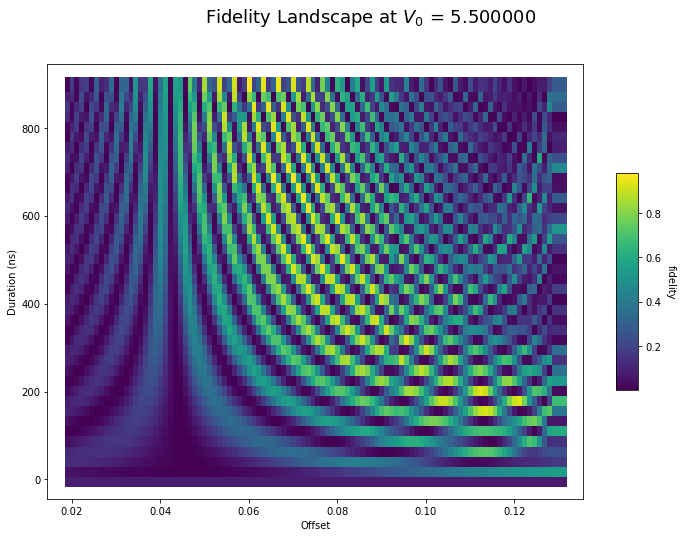

In [24]:
# %matplotlib widget

amps = []
offs = []
durs = []
fids = []
for result in all_results2:
    amps.append(result["amplitude"])
    offs.append(result["offset"])
    durs.append(result["duration"])
    fids.append(result["fidelity"])

fig, axs = plt.subplots(figsize=(12, 8))
fig.suptitle("Fidelity Landscape at $V_0$ = %f " % amps[-1], fontsize=18)
axs.set_xlabel("Offset")
axs.set_ylabel("Duration (ns)")
surf = axs.scatter(offs, np.array(durs), c=fids, cmap=None, marker="s", s=200)
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel("fidelity", rotation=270)
cbar.ax.get_yaxis().labelpad = 15
# axs.pcolormesh(offs, durs, fids)

In [26]:
import utils.saver as saver

saver.save(all_results2, "theoretical_landscape_5-5")